In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science C.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 562 ms, sys: 186 ms, total: 749 ms
Wall time: 956 ms


Timestamp                    Email Address  \
0   6/19/2023 10:08:30   nikomangsulastriasih@gmail.com   
1   5/16/2023 18:54:35           dewadarma199@gmail.com   
2    5/4/2023 17:56:19     gedearyaadinata920@gmail.com   
3   5/16/2023 19:38:03             putuesa770@gmail.com   
4   5/25/2023 18:48:07     kadekchandrawedana@gmail.com   
5    5/7/2023 12:36:43             rajakadek6@gmail.com   
6    5/17/2023 6:53:24     gedearyaadinata920@gmail.com   
7   6/19/2023 10:20:09   nikomangsulastriasih@gmail.com   
8    5/4/2023 17:47:26      imadesuryadharma3@gmail.com   
9   5/16/2023 18:00:21      imadesuryadharma3@gmail.com   
10    5/5/2023 8:41:19         nyomansutarja2@gmail.com   
11  5/25/2023 19:37:05        imademardika066@gmail.com   
12   5/20/2023 8:56:11     gedearyaadinata920@gmail.com   
13  5/16/2023 19:29:41             putuesa770@gmail.com   
14  5/16/2023 18:40:38          putupande2022@gmail.com   
15  5/16/2023 18:31:20              tuardi383@gmail.com   
16   5/4/2023 17:51:33         tiarapuspa2019@gmail.com   
17   5/4/2023 17:48:04            tasyaptri27@gmail.com   
18   5/17/2023 7:06:59         tiarapuspa2019@gmail.com   
19   5/4/2023 18:02:46  2010kadekjesimaharani@gmail.com   
20    5/6/2023 8:54:59         kadekmelani840@gmail.com   
21   5/4/2023 20:33:27            dwikkadek75@gmail.com   
22   5/17/2023 7:42:50         tiarapuspa2019@gmail.com   
23  5/16/2023 19:31:31        kadekrismaa2020@gmail.com   
24   5/17/2023 9:20:48      wulanmahaputri976@gmail.com   
25   5/4/2023 21:32:06    niputuayukeylaputri@gmail.com   
26  6/19/2023 10:24:23   nikomangsulastriasih@gmail.com   
27   5/5/2023 20:35:29       nyomancandradewi@gmail.com   
28   5/17/2023 7:03:30         kadekmelani840@gmail.com   
29   5/4/2023 18:51:17        gitachyaniii859@gmail.com   
30  5/16/2023 18:04:00               ip649630@gmail.com   
31  5/16/2023 18:54:57               ip649630@gmail.com   
32    5/5/2023 9:16:29           rominikomang@gmail.com   
33  6/19/2023 10:26:44   nikomangsulastriasih@gmail.com   
34   5/5/2023 18:02:06            putueva2401@gmail.com   
35   5/4/2023 18:32:39      fredysetiawan1510@gmail.com   
36  5/20/2023 12:27:20      fredysetiawan1510@gmail.com   

                           NAMA LENGKAP  NO ABSEN KELAS  \
0               Gede Resa Putra Adinata         1  VIIC   
1               I Dewa Putu Darma Putra         2  VIIC   
2                   I Gede Arya Adinata         3  VIIC   
3               I Kadek Agus Dwi Antara         4  VIIC   
4                I Kadek Chandra Wedana         5  VIIC   
5                   I Kadek Raja Wiguna         6  VIIC   
6                I Kadek Yogi Dwipayana         7  VIIC   
7                I Komang Dipta Prayoga         8  VIIC   
8                   I Made Surya Dharma         9  VIIC   
9                   I Made Surya Dharma         9  VIIC   
10            I Made Vio Andika Saputra        10  VIIC   
11                 I Nyoman Adi Suputra        11  VIIC   
12                  I Putu Aditya Putra        12  VIIC   
13              I Putu Esa Septriandana        13  VIIC   
14               I Putu Pande Agus Tira        14  VIIC   
15              I Putu Widi Arta Wiguna        15  VIIC   
16               Kadek Tiara Puspa Sari        16  VIIC   
17      Ni Kadek Anastasya Krisna Putri        17  VIIC   
18              Ni Kadek Cahaya Kartika        18  VIIC   
19               Ni Kadek Jesi Maharani        19  VIIC   
20                      Ni Kadek Melani        20  VIIC   
21             Ni Kadek Noviari Karmila        21  VIIC   
22               Ni Kadek Rahma Cantika        22  VIIC   
23           Ni Kadek Risma Pradnyadewi        23  VIIC   
24            Ni Kadek Wulan Maha Putri        24  VIIC   
25          Ni Luh Putu Ayu Keyla Putri        25  VIIC   
26              Ni Made Laksmi Widiasih        26  VIIC   
27                Ni Nyoman Candra Dewi        27  VIIC   
28                 Ni Putu Ayu Diantari        28  VIIC   


In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

            Timestamp                   Email Address  \
0  6/19/2023 10:08:30  nikomangsulastriasih@gmail.com   
1  5/16/2023 18:54:35          dewadarma199@gmail.com   
2   5/4/2023 17:56:19    gedearyaadinata920@gmail.com   
3  5/16/2023 19:38:03            putuesa770@gmail.com   
4  5/25/2023 18:48:07    kadekchandrawedana@gmail.com   

              NAMA LENGKAP  NO ABSEN KELAS  \
0  Gede Resa Putra Adinata         1  VIIC   
1  I Dewa Putu Darma Putra         2  VIIC   
2      I Gede Arya Adinata         3  VIIC   
3  I Kadek Agus Dwi Antara         4  VIIC   
4   I Kadek Chandra Wedana         5  VIIC   

  1. Teman anda yang paling anda sukai di kelas                 Alasan  \
0                          I Nyoman Adi Suputra            karena baik   
1                        I Kadek Chandra Wedana        Karena dia baik   
2                           Putu Fredy Setiawan  Bisa diajak bercanda    
3                          I Nyoman Adi Suputra        Saling membantu   
4         

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 1.16 ms, sys: 130 µs, total: 1.29 ms
Wall time: 1.26 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 383 µs, sys: 44 µs, total: 427 µs
Wall time: 417 µs


In [6]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data C.csv', index=False)

CPU times: user 3.41 ms, sys: 3.45 ms, total: 6.86 ms
Wall time: 4.87 ms


In [7]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 315 µs, sys: 46 µs, total: 361 µs
Wall time: 349 µs


In [8]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 239 µs, sys: 58 µs, total: 297 µs
Wall time: 248 µs


In [9]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 8.96 ms, sys: 427 µs, total: 9.38 ms
Wall time: 11.5 ms


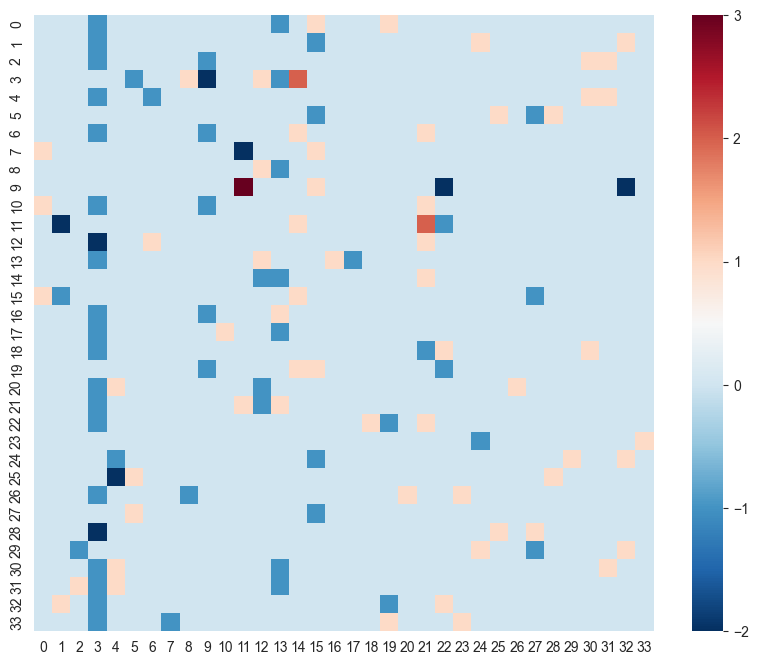

CPU times: user 3.66 s, sys: 174 ms, total: 3.83 s
Wall time: 6.59 s


In [67]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [10]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 1.65 ms, sys: 401 µs, total: 2.05 ms
Wall time: 1.71 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

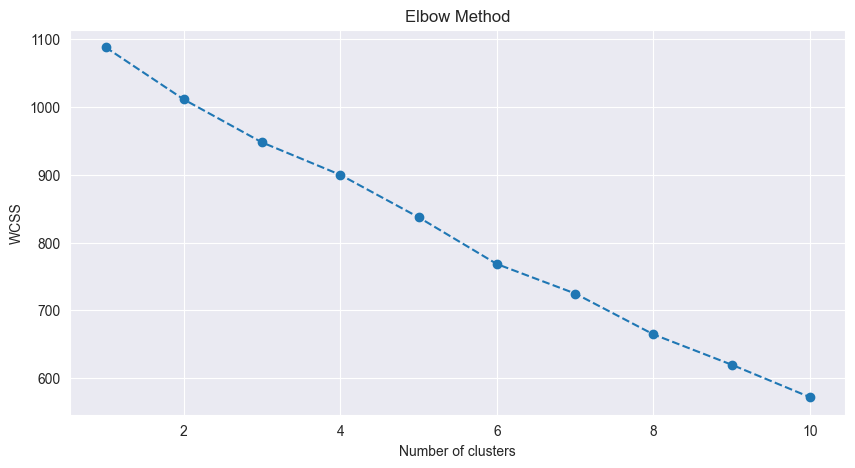

CPU times: user 2.98 s, sys: 324 ms, total: 3.31 s
Wall time: 1.47 s


In [11]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 56.9 ms, sys: 11.8 ms, total: 68.7 ms
Wall time: 56.7 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

            Timestamp                   Email Address  \
0  6/19/2023 10:08:30  nikomangsulastriasih@gmail.com   
1  5/16/2023 18:54:35          dewadarma199@gmail.com   
2   5/4/2023 17:56:19    gedearyaadinata920@gmail.com   
3  5/16/2023 19:38:03            putuesa770@gmail.com   
4  5/25/2023 18:48:07    kadekchandrawedana@gmail.com   

              NAMA LENGKAP  NO ABSEN KELAS  \
0  Gede Resa Putra Adinata         1  VIIC   
1  I Dewa Putu Darma Putra         2  VIIC   
2      I Gede Arya Adinata         3  VIIC   
3  I Kadek Agus Dwi Antara         4  VIIC   
4   I Kadek Chandra Wedana         5  VIIC   

  1. Teman anda yang paling anda sukai di kelas                 Alasan  \
0                          I Nyoman Adi Suputra            karena baik   
1                        I Kadek Chandra Wedana        Karena dia baik   
2                           Putu Fredy Setiawan  Bisa diajak bercanda    
3                          I Nyoman Adi Suputra        Saling membantu   
4         

In [14]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



34
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [15]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 210 µs, sys: 43 µs, total: 253 µs
Wall time: 244 µs


In [16]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                   Email Address  \
0   6/19/2023 10:08:30  nikomangsulastriasih@gmail.com   
1   5/16/2023 18:54:35          dewadarma199@gmail.com   
2    5/4/2023 17:56:19    gedearyaadinata920@gmail.com   
4   5/25/2023 18:48:07    kadekchandrawedana@gmail.com   
6    5/17/2023 6:53:24    gedearyaadinata920@gmail.com   
10  5/25/2023 19:37:05       imademardika066@gmail.com   
12  5/16/2023 19:29:41            putuesa770@gmail.com   
13  5/16/2023 18:40:38         putupande2022@gmail.com   
14  5/16/2023 18:31:20             tuardi383@gmail.com   
19    5/6/2023 8:54:59        kadekmelani840@gmail.com   
28   5/4/2023 18:51:17       gitachyaniii859@gmail.com   
33   5/4/2023 18:32:39     fredysetiawan1510@gmail.com   

               NAMA LENGKAP  NO ABSEN KELAS  \
0   Gede Resa Putra Adinata         1  VIIC   
1   I Dewa Putu Darma Putra         2  VIIC   
2       I Gede Arya Adinata         3  VIIC   
4    I Kadek Chandra Wedana         5  VIIC   
6    I Kad

In [17]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 53 µs, sys: 36 µs, total: 89 µs
Wall time: 96.1 µs


In [18]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 4.68 ms, sys: 70 µs, total: 4.75 ms
Wall time: 4.73 ms


In [19]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 9.53 ms, sys: 1.19 ms, total: 10.7 ms
Wall time: 10 ms


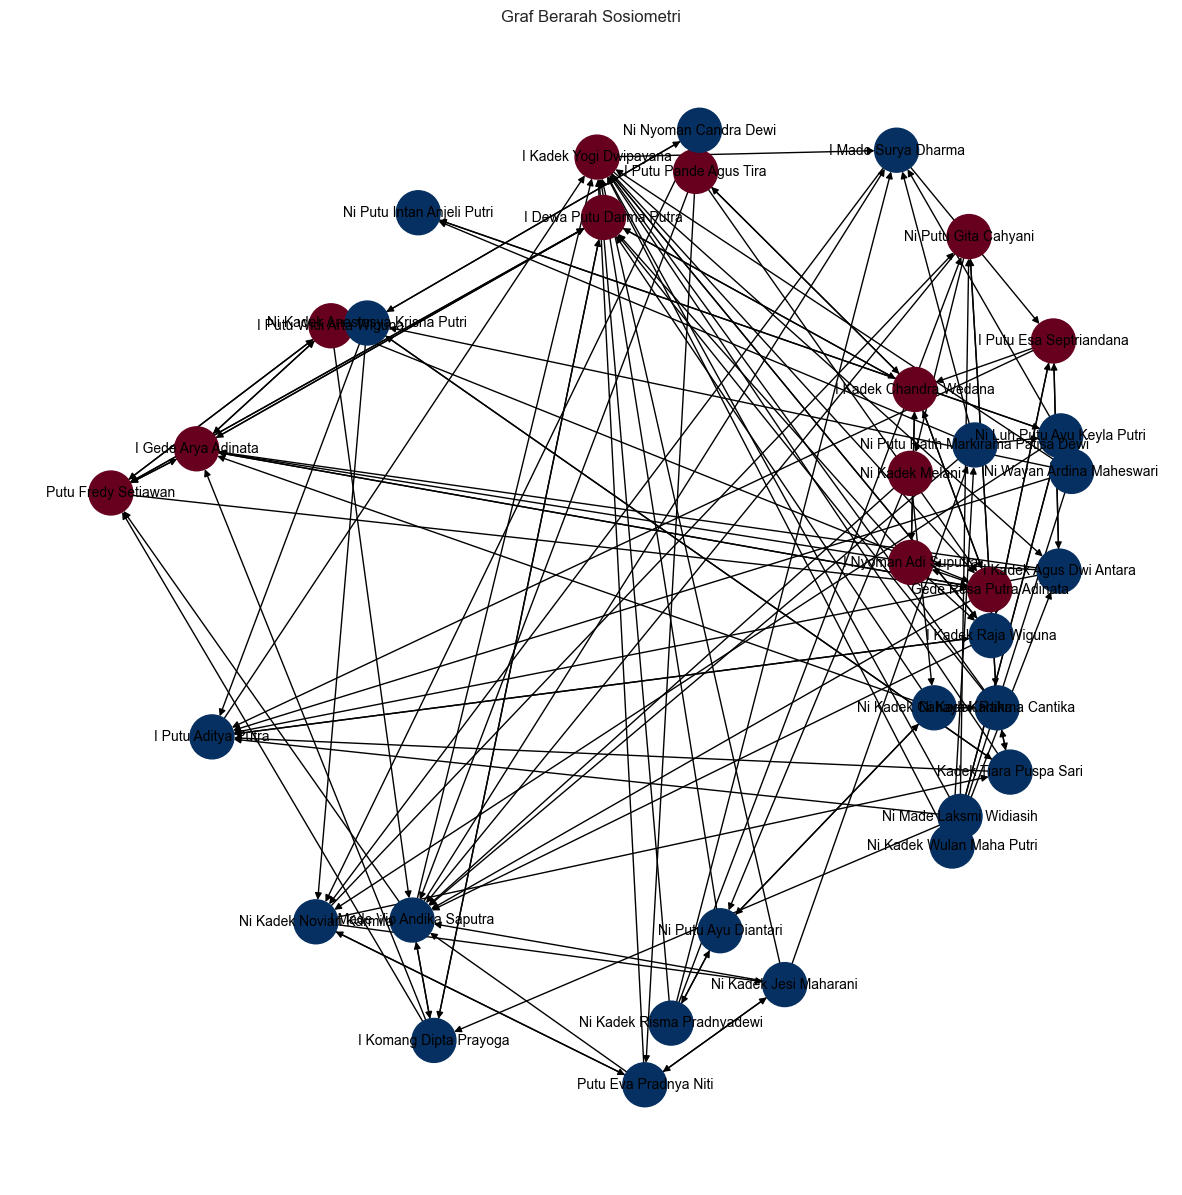

CPU times: user 2.84 s, sys: 172 ms, total: 3.01 s
Wall time: 3.03 s


In [20]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [21]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 254 µs, sys: 6 µs, total: 260 µs
Wall time: 268 µs


In [22]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 4.33 ms, sys: 375 µs, total: 4.71 ms
Wall time: 4.48 ms


In [23]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
             Timestamp                 Email Address             NAMA LENGKAP  \
33   5/4/2023 18:32:39   fredysetiawan1510@gmail.com      Putu Fredy Setiawan   
4   5/25/2023 18:48:07  kadekchandrawedana@gmail.com   I Kadek Chandra Wedana   
27   5/17/2023 7:03:30      kadekmelani840@gmail.com     Ni Putu Ayu Diantari   
12  5/16/2023 19:29:41          putuesa770@gmail.com  I Putu Esa Septriandana   
28   5/4/2023 18:51:17     gitachyaniii859@gmail.com     Ni Putu Gita Cahyani   

    NO ABSEN KELAS 1. Teman anda yang paling anda sukai di kelas  \
33        34  VIIC                       I Dewa Putu Darma Putra   
4          5  VIIC                        I Putu Pande Agus Tira   
27        28  VIIC                    Ni Kadek Risma Pradnyadewi   
12        13  VIIC                       I Kadek Agus Dwi Antara   
28        29  VIIC                        Ni Kadek Rahma Cantika   

                                               Alasan  \
33        

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


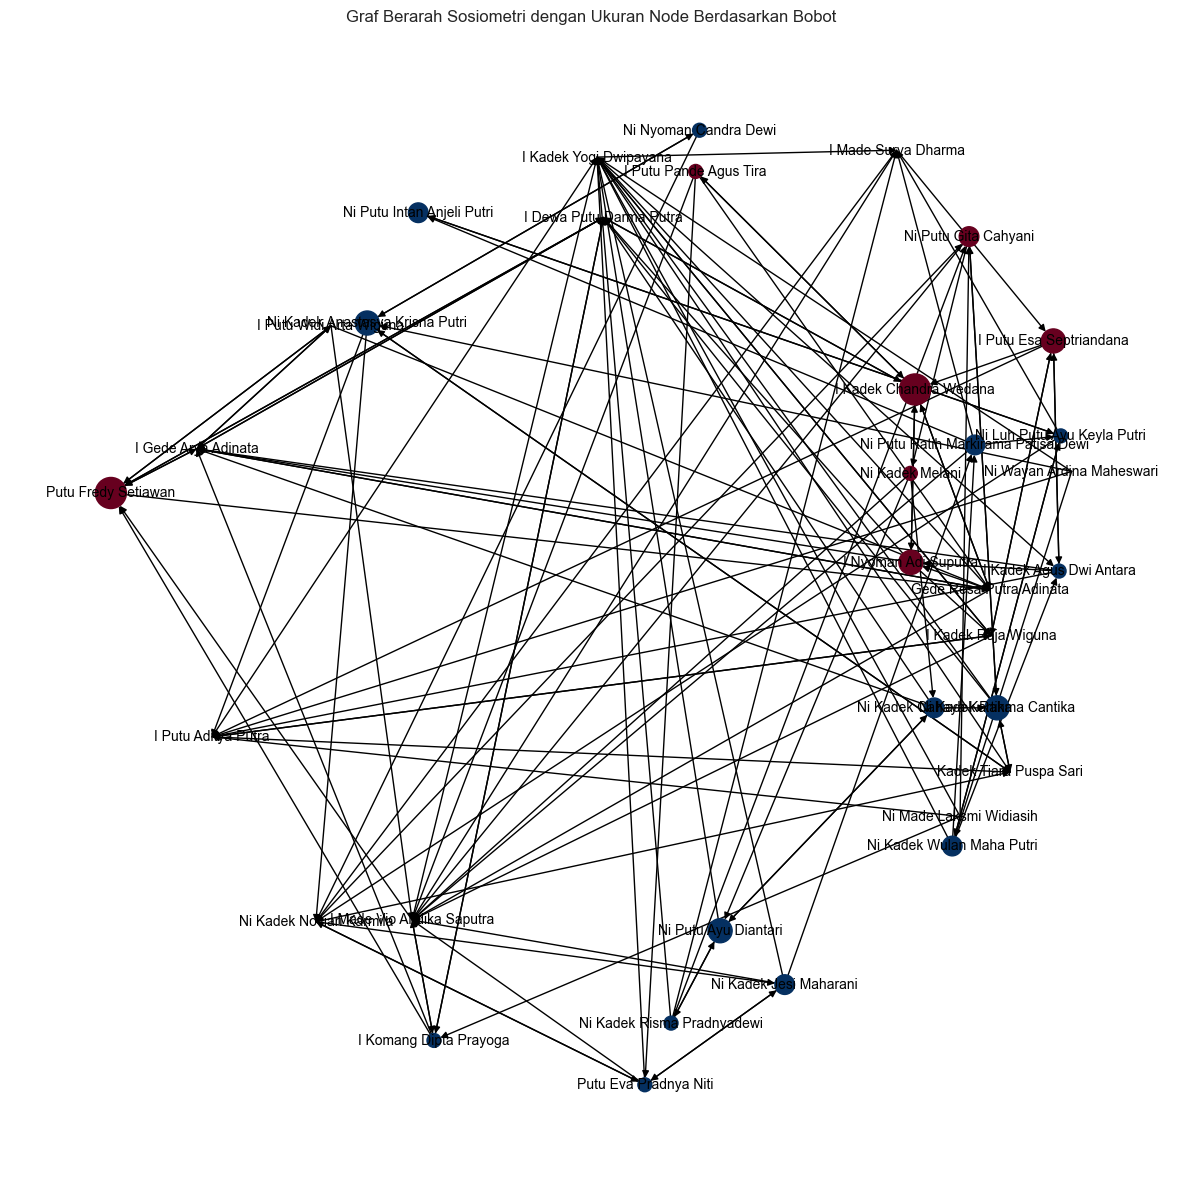

CPU times: user 1.81 s, sys: 146 ms, total: 1.96 s
Wall time: 1.65 s


In [24]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [25]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 16.9 µs


In [26]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 198 µs, sys: 2 µs, total: 200 µs
Wall time: 206 µs


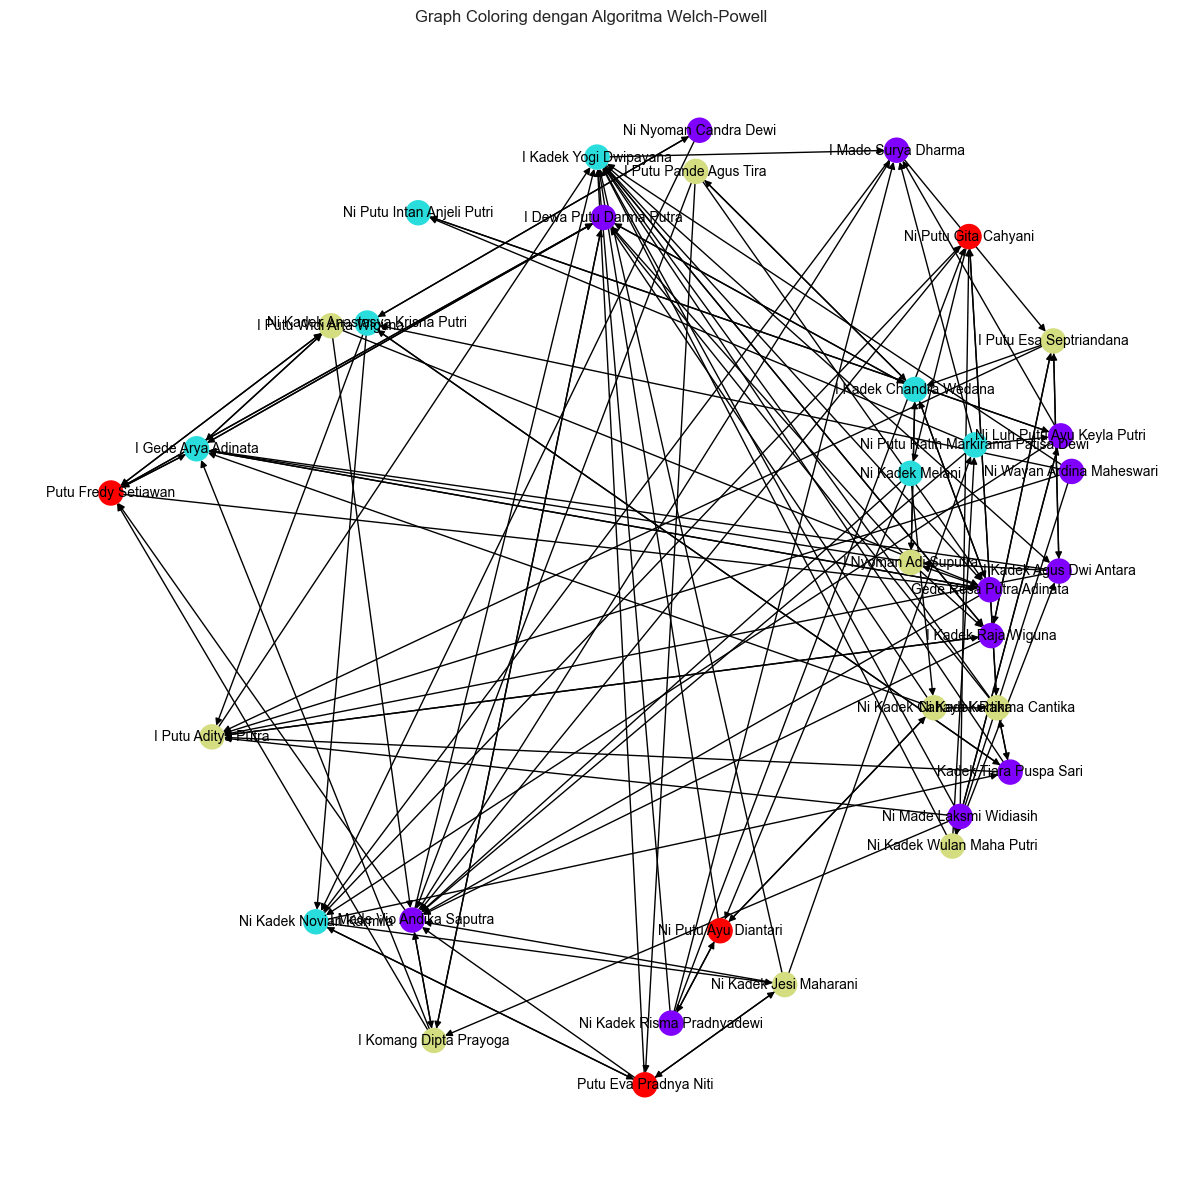

CPU times: user 2.82 s, sys: 211 ms, total: 3.03 s
Wall time: 2.99 s


In [27]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


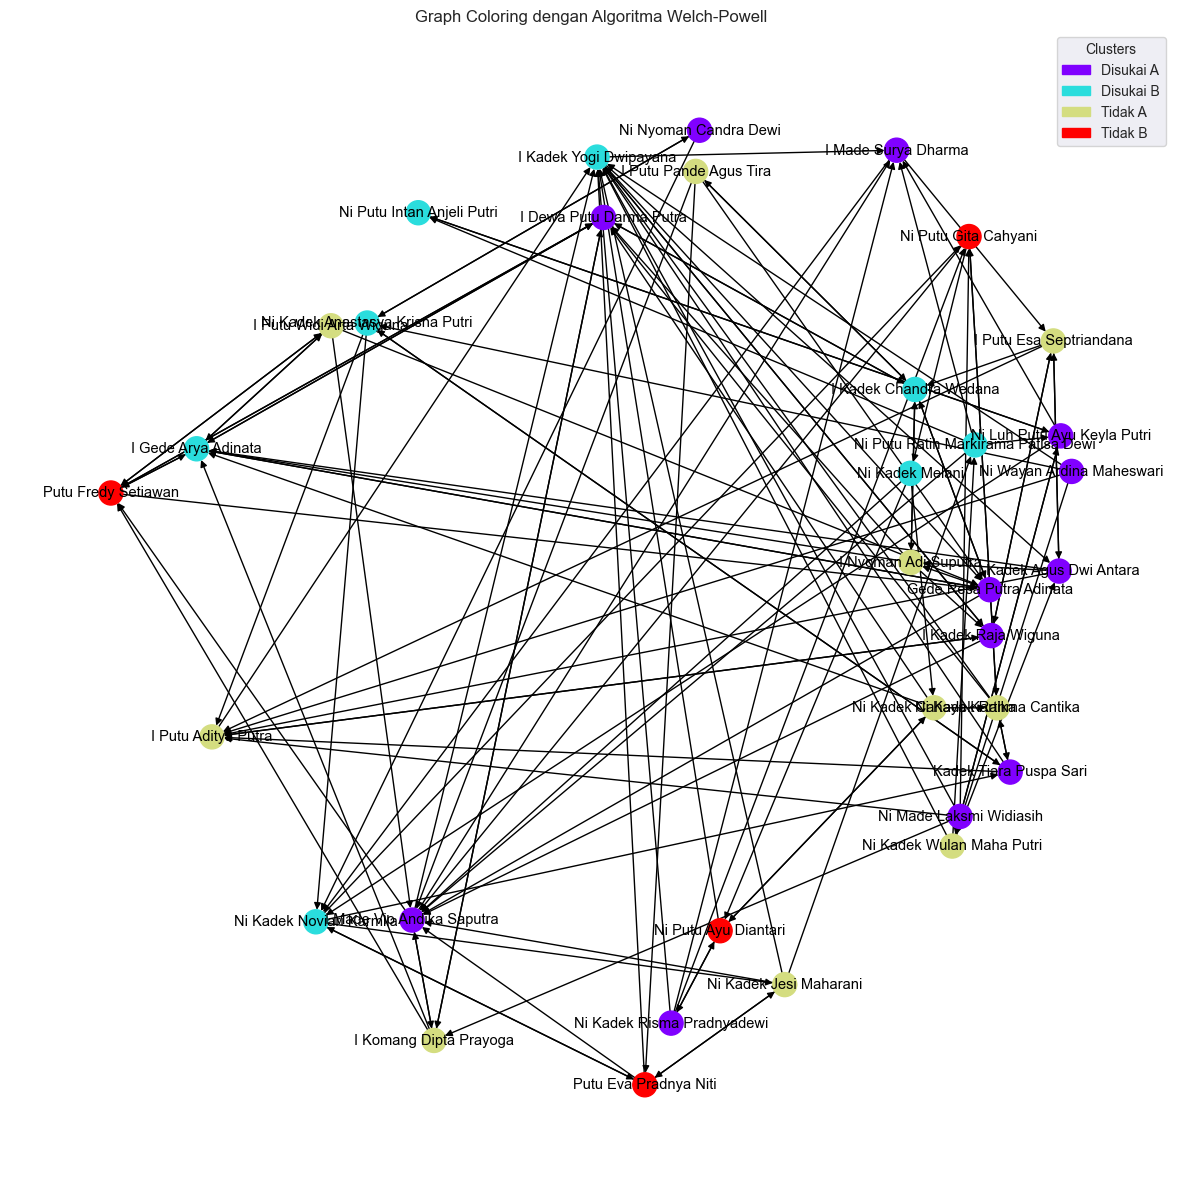

CPU times: user 5.03 s, sys: 280 ms, total: 5.31 s
Wall time: 5.08 s


'\nungu = 12\ntoska = 8\nalpukat = 12\nmerah = 2\n'

In [28]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()



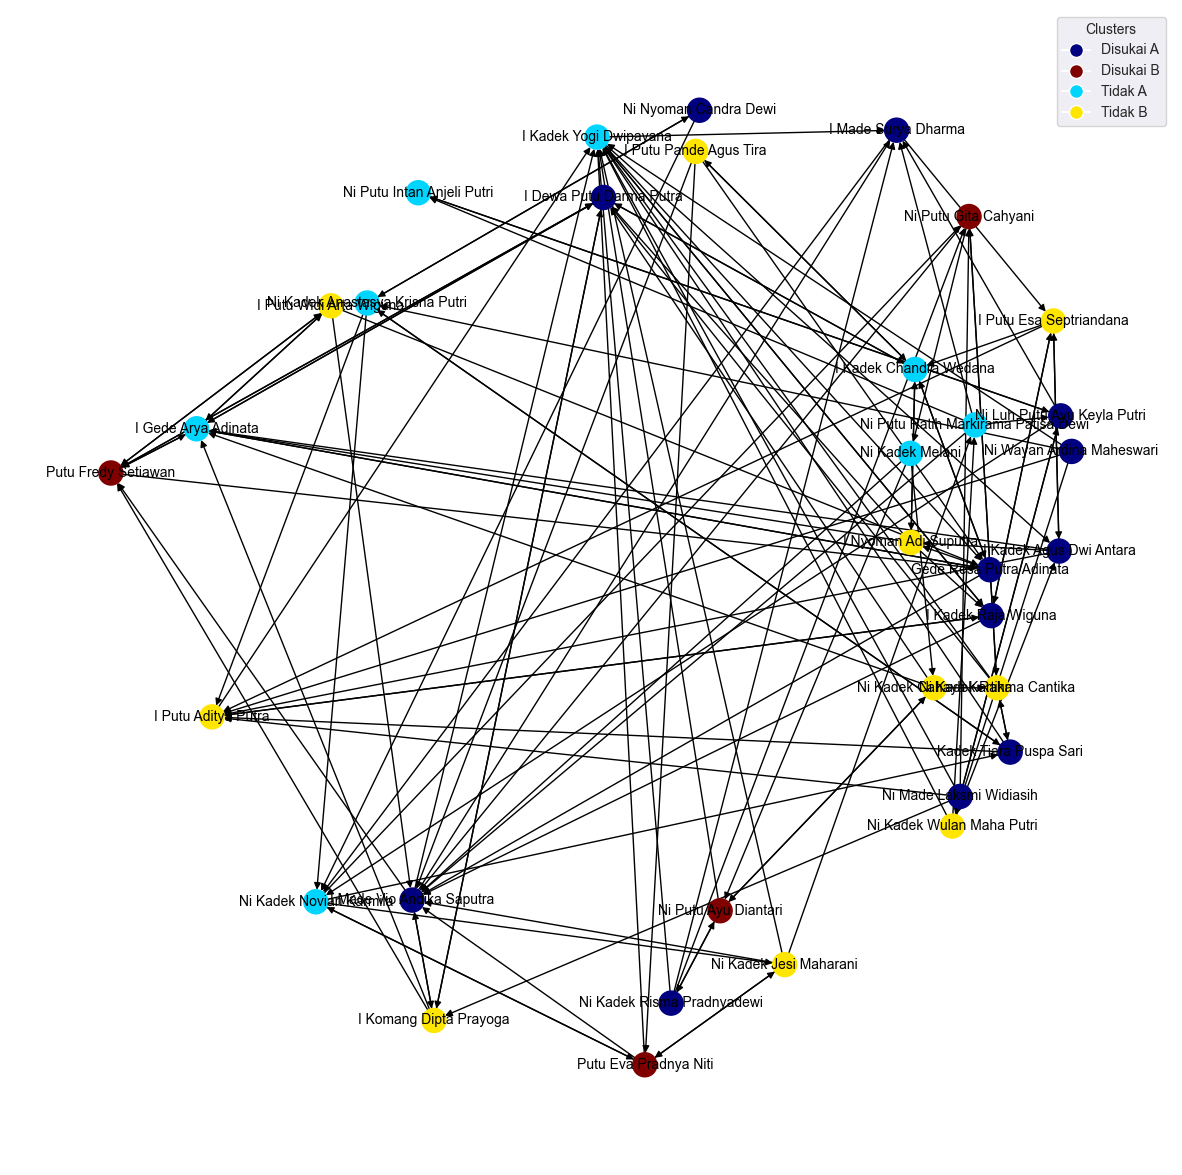

CPU times: user 6.62 s, sys: 319 ms, total: 6.94 s
Wall time: 7.56 s


In [29]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


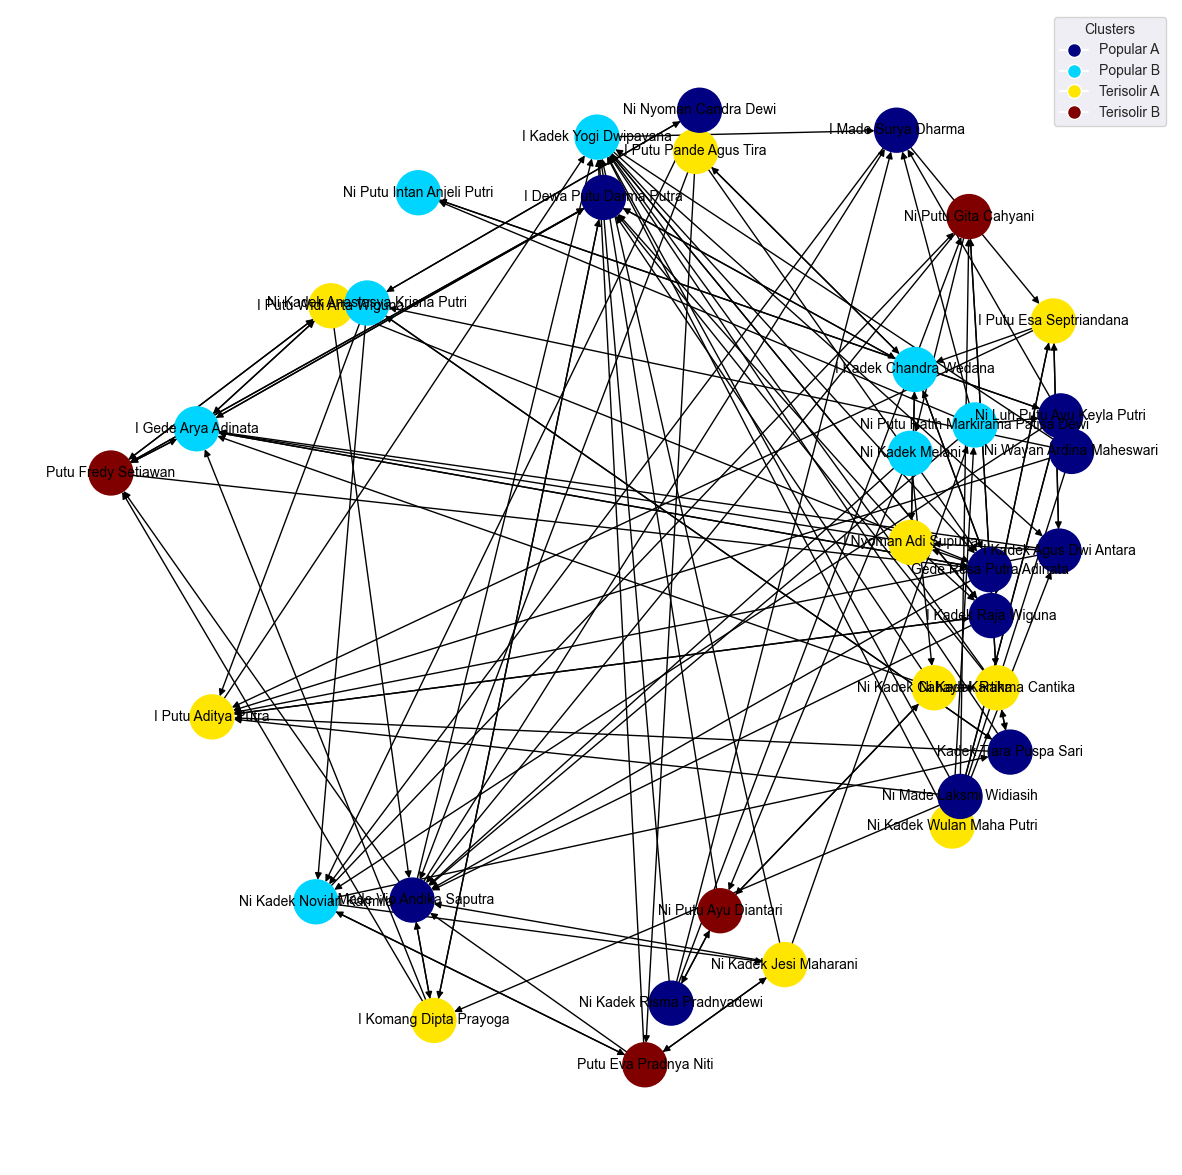

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


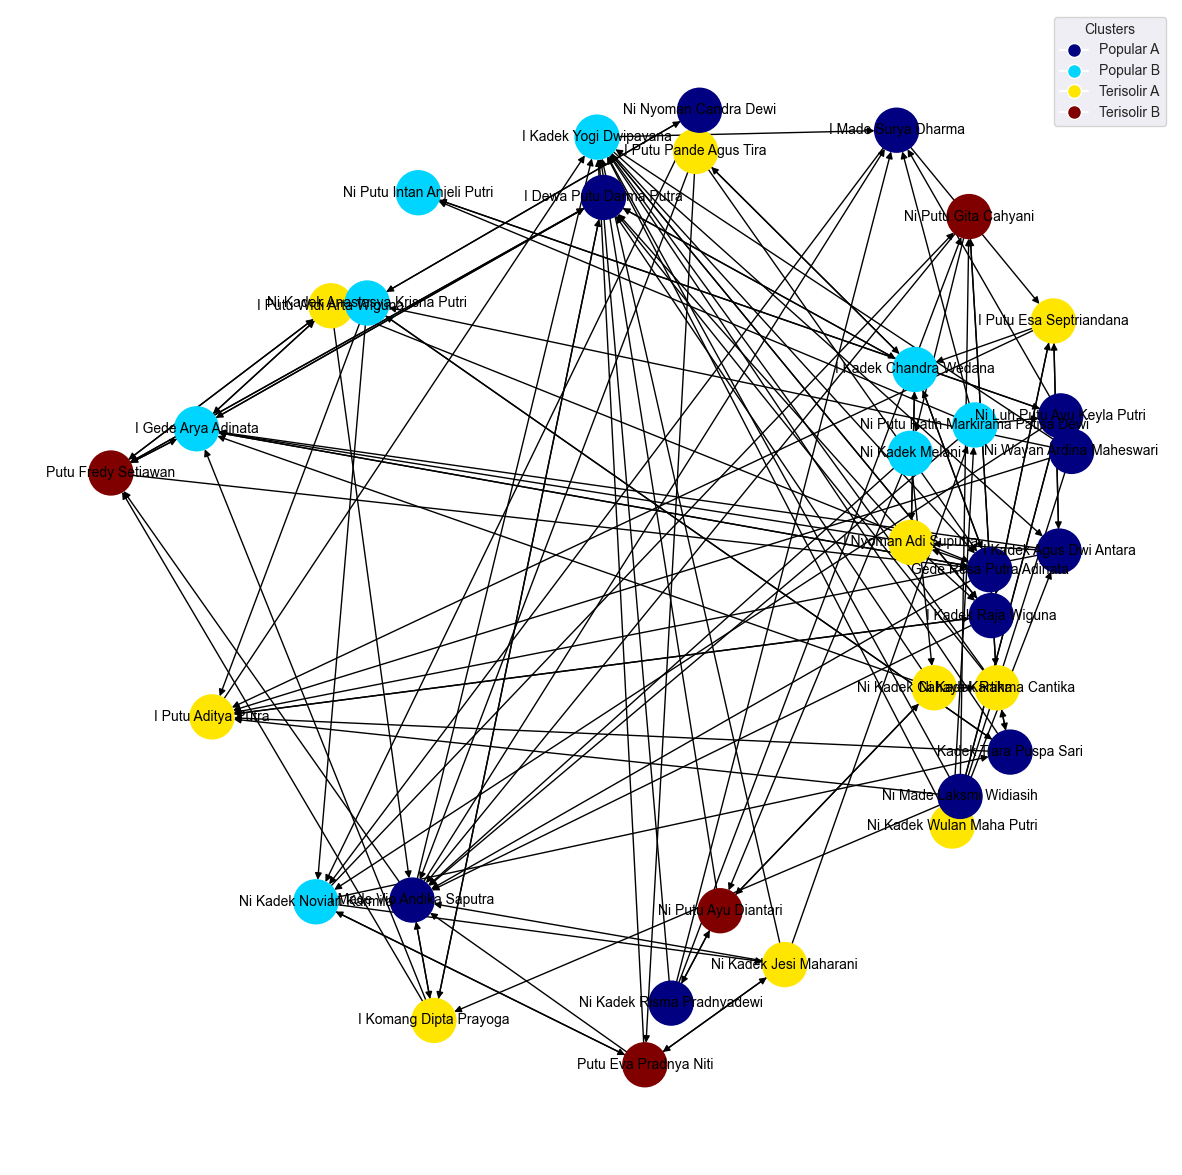

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


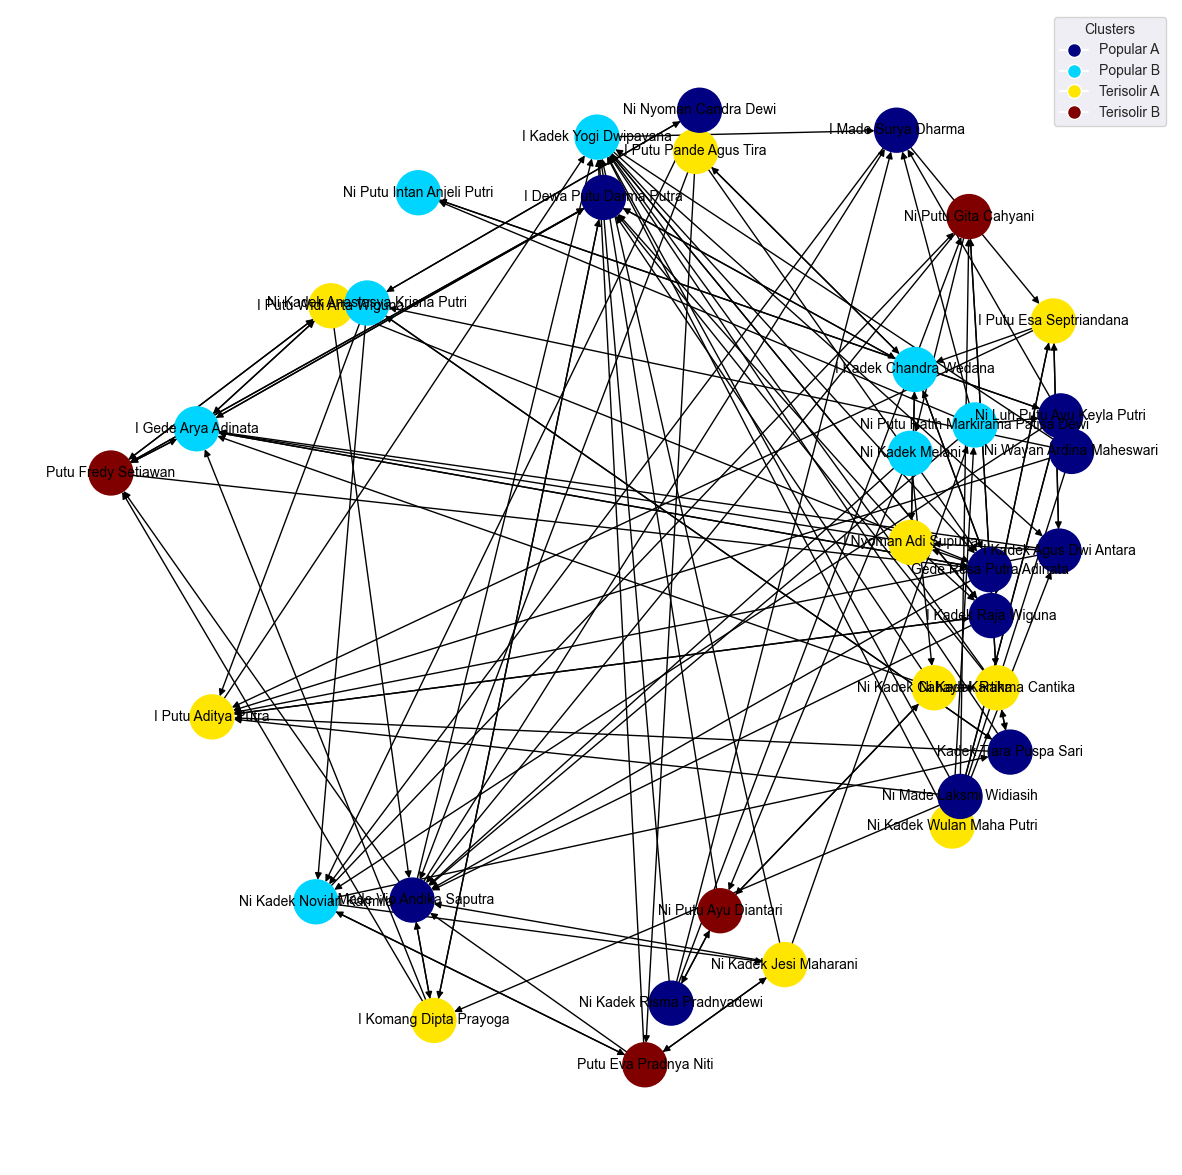

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


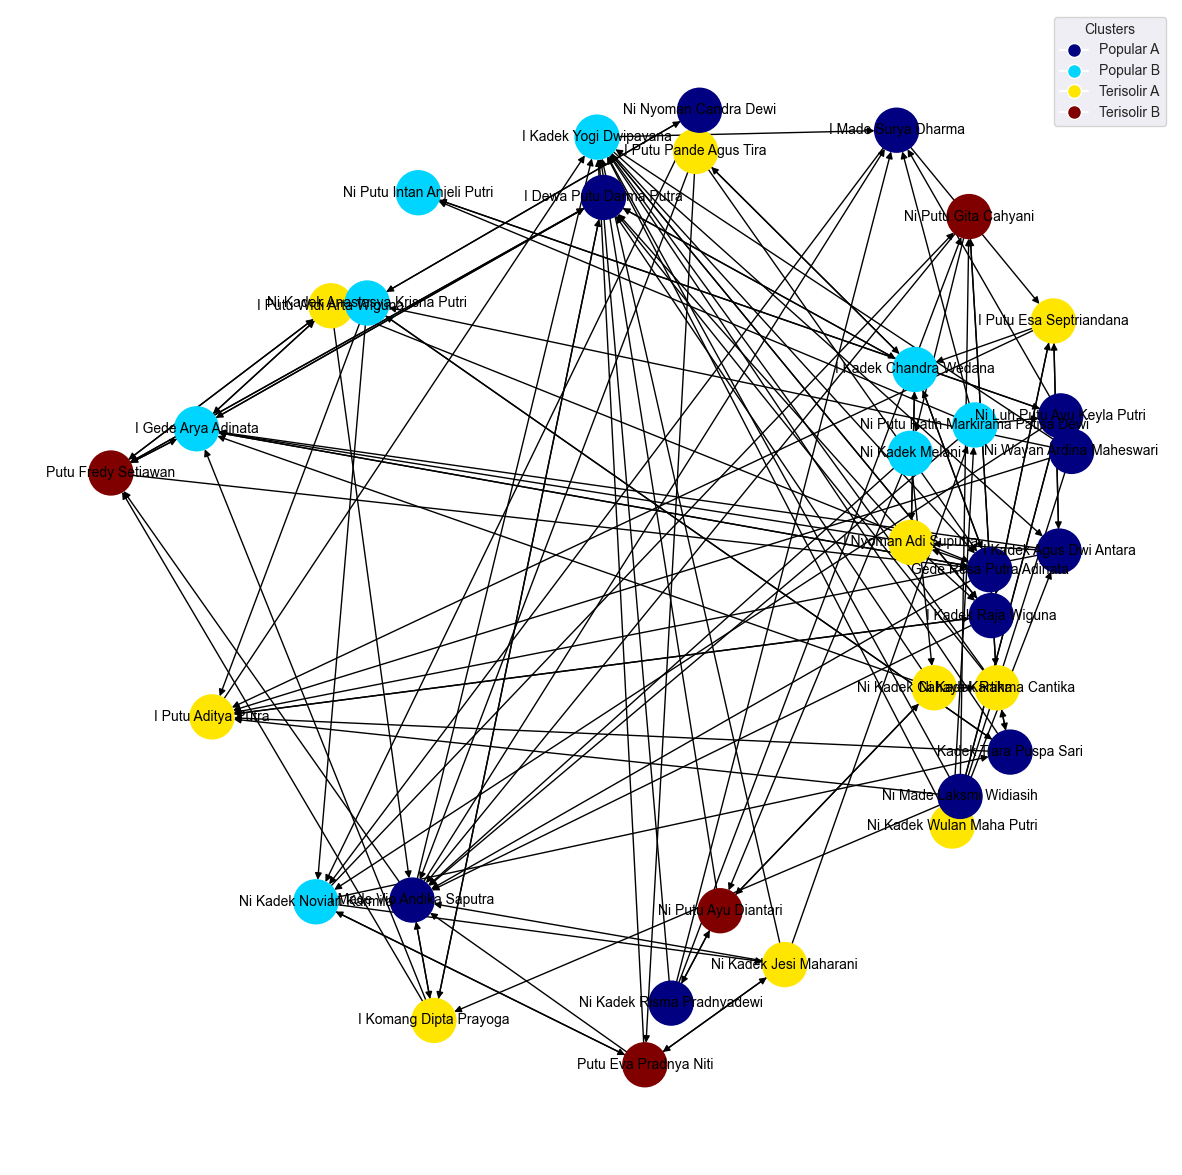

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


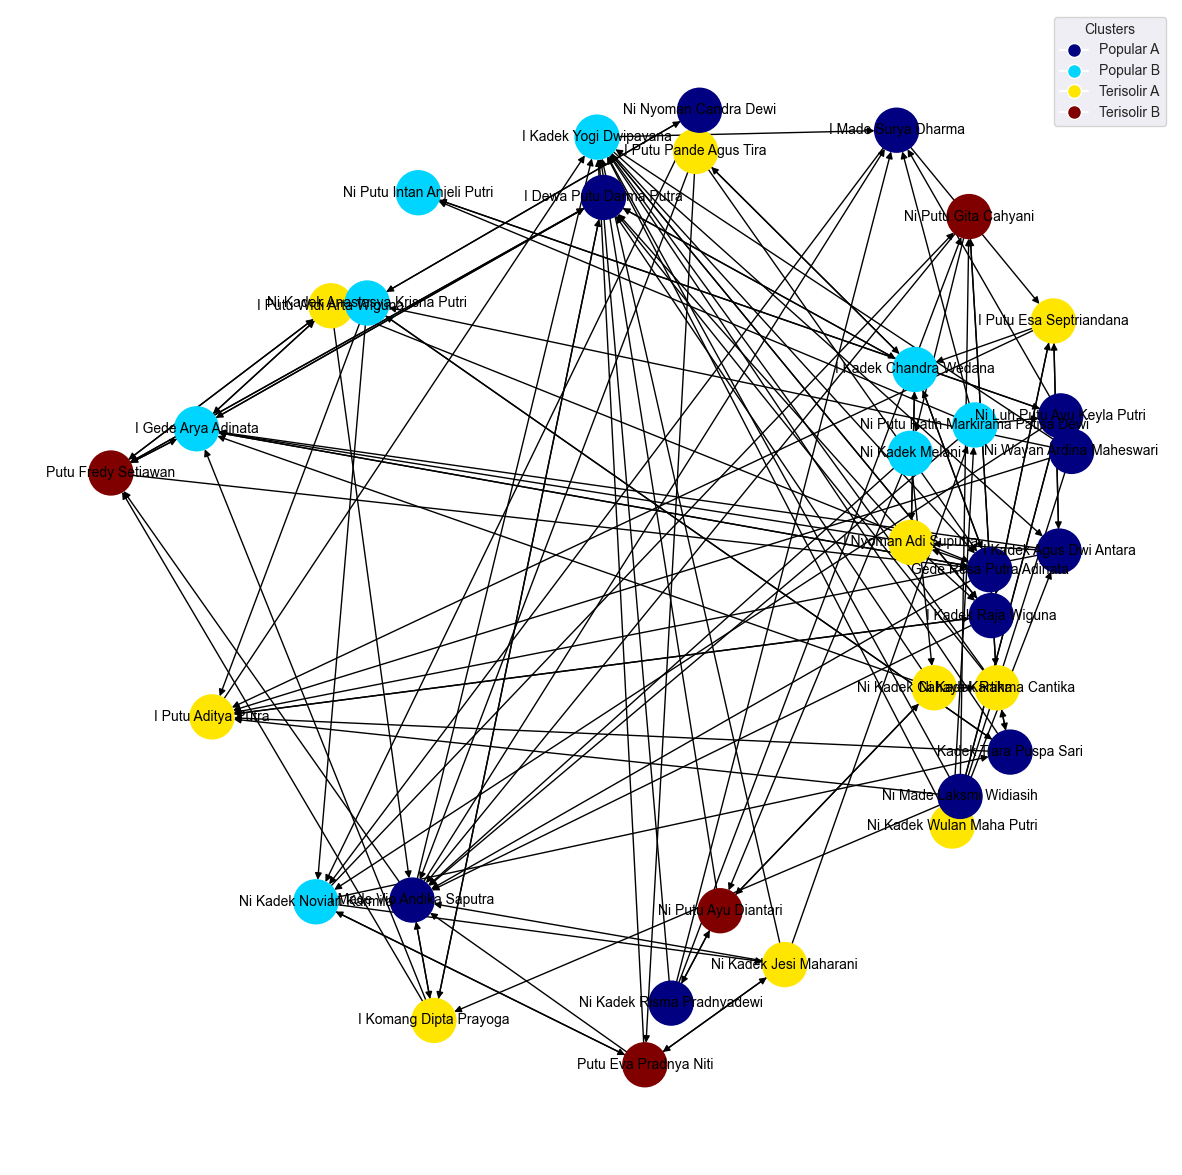

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


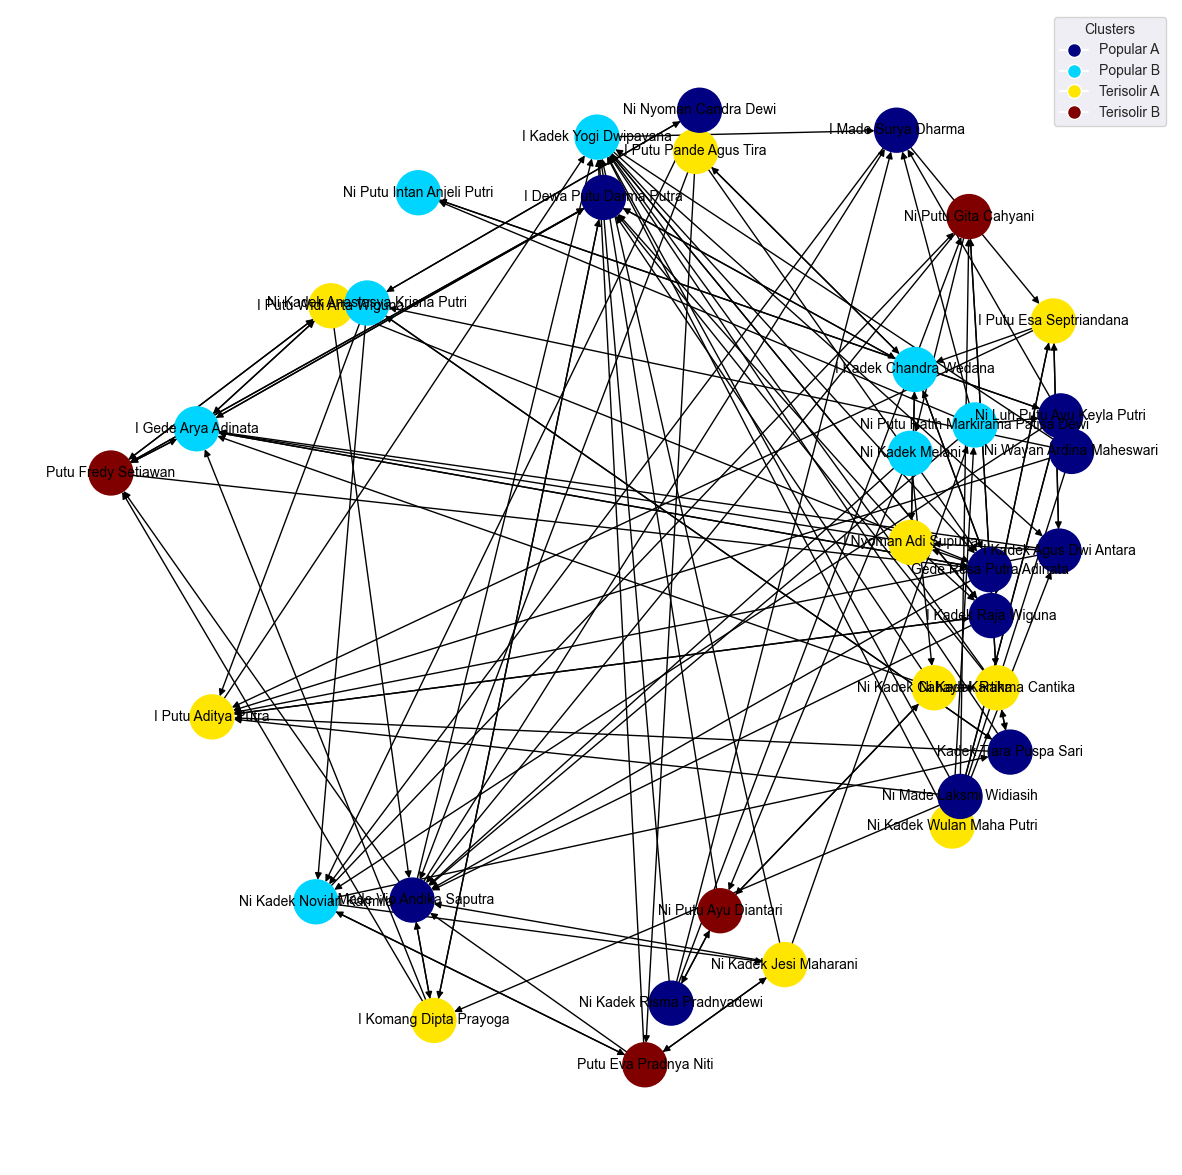

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


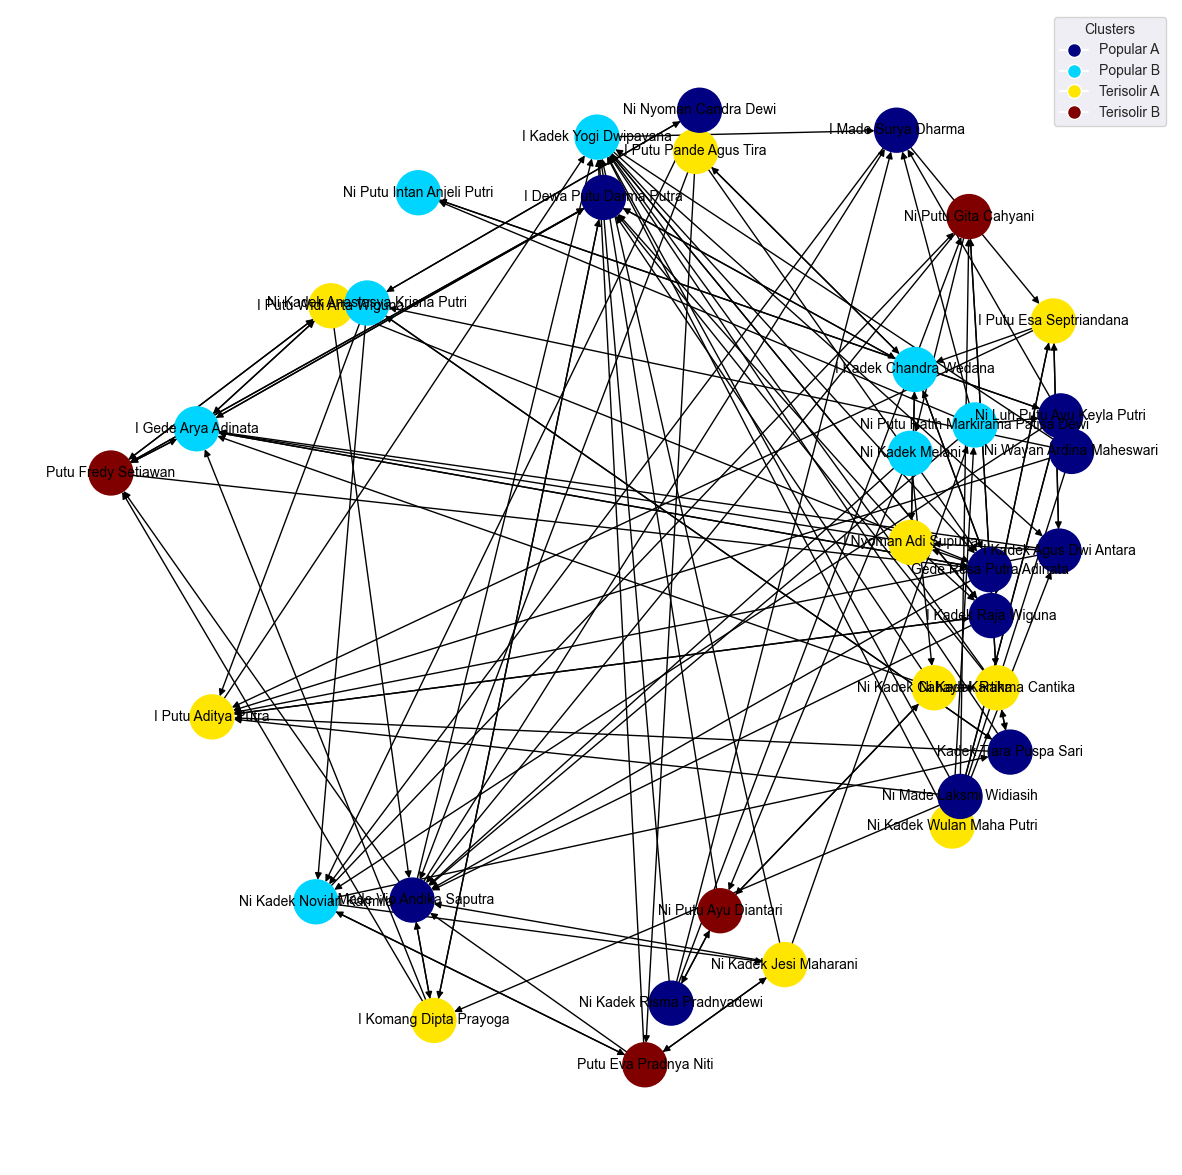

Nodes yang hilang: [0, 1, 3, 5, 8, 9, 15, 22, 24, 25, 26, 31, 2, 4, 6, 16, 19, 20, 29, 30, 7, 10, 11, 12, 13, 14, 17, 18, 21, 23, 27, 28, 32, 33]


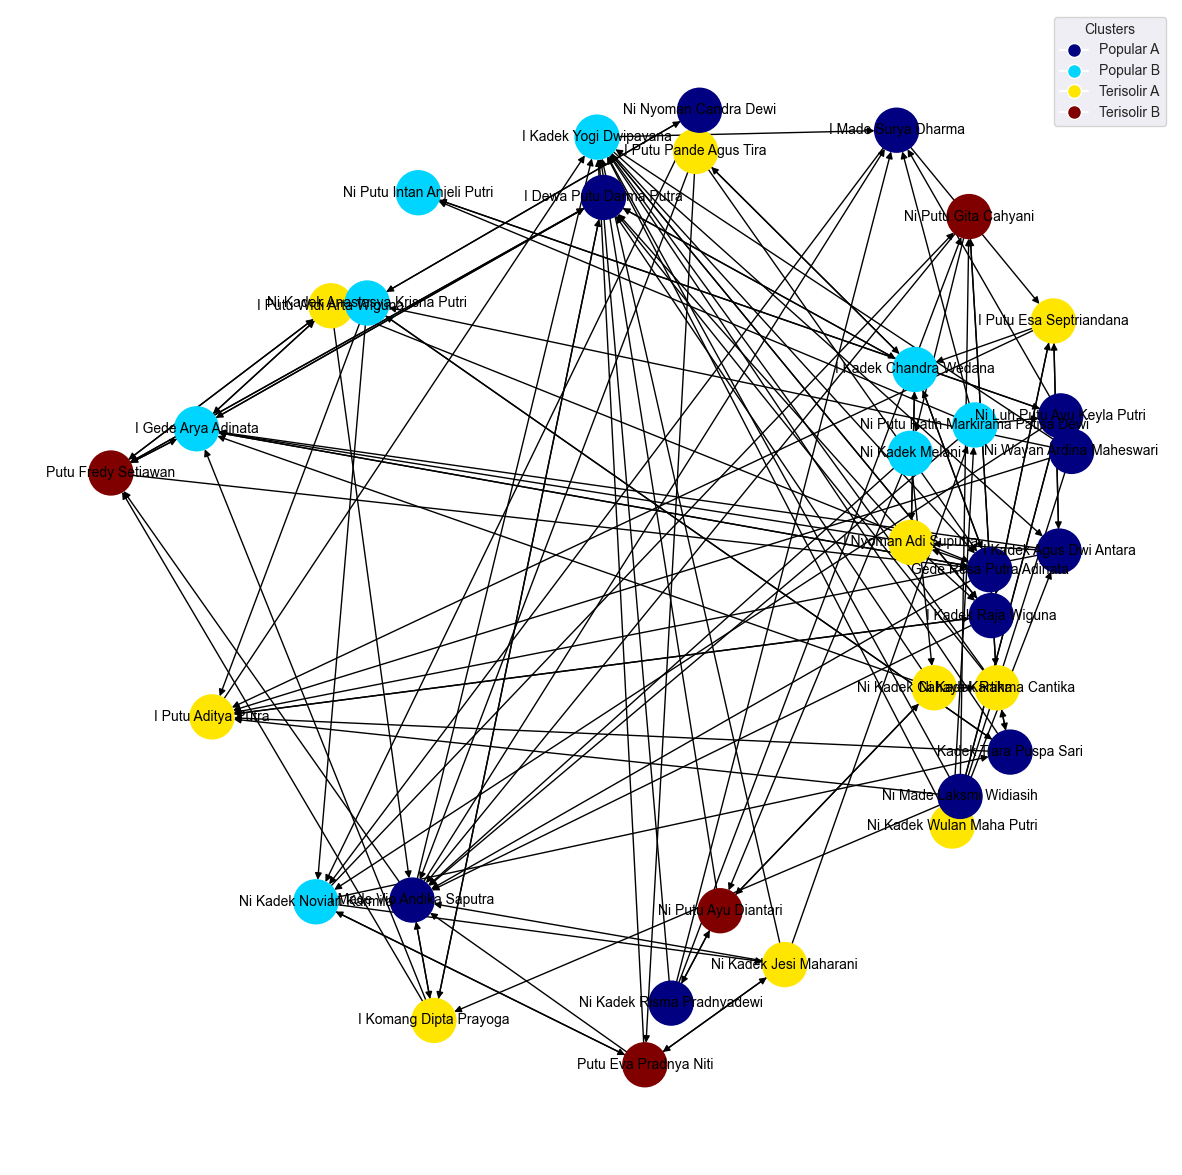

5.82 s ± 551 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%%timeit
bobot = {}
missing_nodes = []

# Code to initialize bobot for missing_nodes (assuming you have G defined somewhere)
for node in missing_nodes:
    bobot[node] = 0

for color_group in set(colors):
    nodes_in_group = [node for node, color in enumerate(colors) if color == color_group]
    for node in nodes_in_group:
        if node not in bobot:
            missing_nodes.append(node)
            bobot[node] = 0  # Initialize missing nodes in the bobot dictionary

print("Nodes yang hilang:", missing_nodes)

for node in G.nodes():
    bobot[node] = G.degree(node)

cluster_bobot_avg = {}

for color_group in set(colors):
    nodes_in_group = [node for node, color in enumerate(colors) if color == color_group]
    avg_bobot = np.mean([bobot[node] for node in nodes_in_group])  # Calculate the average degree for nodes in the group
    cluster_bobot_avg[color_group] = avg_bobot

sorted_clusters_by_bobot = sorted(cluster_bobot_avg.items(),
                                  key=lambda x: x[1],
                                  reverse=True)

custom_labels = {
    sorted_clusters_by_bobot[0][0]: "Popular A",
    sorted_clusters_by_bobot[1][0]: "Popular B",
    sorted_clusters_by_bobot[2][0]: "Terisolir A",
    sorted_clusters_by_bobot[3][0]: "Terisolir B"
}

# Example visualization code (you can customize this according to your data)
cmap = plt.cm.jet
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

nx.draw(G,
        pos,
        with_labels=True,
        node_color=mapped_colors,
        node_size=1000,
        font_size=10,
        ax=ax)

unique_color_groups = list(set(colors))
unique_colors_mapped = [cmap(norm(value)) for value in unique_color_groups]
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[group],
                      markersize=10,
                      markerfacecolor=color) for group, color in zip(unique_color_groups,
                                                                     unique_colors_mapped)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [31]:
file_path = "./sociometryclustering/Processed Data C.csv"
df = pd.read_csv(file_path)
df

Timestamp                    Email Address  \
0   6/19/2023 10:08:30   nikomangsulastriasih@gmail.com   
1   5/16/2023 18:54:35           dewadarma199@gmail.com   
2    5/4/2023 17:56:19     gedearyaadinata920@gmail.com   
3   5/16/2023 19:38:03             putuesa770@gmail.com   
4   5/25/2023 18:48:07     kadekchandrawedana@gmail.com   
5    5/7/2023 12:36:43             rajakadek6@gmail.com   
6    5/17/2023 6:53:24     gedearyaadinata920@gmail.com   
7   6/19/2023 10:20:09   nikomangsulastriasih@gmail.com   
8    5/4/2023 17:47:26      imadesuryadharma3@gmail.com   
9   5/16/2023 18:00:21      imadesuryadharma3@gmail.com   
10    5/5/2023 8:41:19         nyomansutarja2@gmail.com   
11  5/25/2023 19:37:05        imademardika066@gmail.com   
12   5/20/2023 8:56:11     gedearyaadinata920@gmail.com   
13  5/16/2023 19:29:41             putuesa770@gmail.com   
14  5/16/2023 18:40:38          putupande2022@gmail.com   
15  5/16/2023 18:31:20              tuardi383@gmail.com   
16   5/4/2023 17:51:33         tiarapuspa2019@gmail.com   
17   5/4/2023 17:48:04            tasyaptri27@gmail.com   
18   5/17/2023 7:06:59         tiarapuspa2019@gmail.com   
19   5/4/2023 18:02:46  2010kadekjesimaharani@gmail.com   
20    5/6/2023 8:54:59         kadekmelani840@gmail.com   
21   5/4/2023 20:33:27            dwikkadek75@gmail.com   
22   5/17/2023 7:42:50         tiarapuspa2019@gmail.com   
23  5/16/2023 19:31:31        kadekrismaa2020@gmail.com   
24   5/17/2023 9:20:48      wulanmahaputri976@gmail.com   
25   5/4/2023 21:32:06    niputuayukeylaputri@gmail.com   
26  6/19/2023 10:24:23   nikomangsulastriasih@gmail.com   
27   5/5/2023 20:35:29       nyomancandradewi@gmail.com   
28   5/17/2023 7:03:30         kadekmelani840@gmail.com   
29   5/4/2023 18:51:17        gitachyaniii859@gmail.com   
30  5/16/2023 18:04:00               ip649630@gmail.com   
31  5/16/2023 18:54:57               ip649630@gmail.com   
32    5/5/2023 9:16:29           rominikomang@gmail.com   
33  6/19/2023 10:26:44   nikomangsulastriasih@gmail.com   
34   5/5/2023 18:02:06            putueva2401@gmail.com   
35   5/4/2023 18:32:39      fredysetiawan1510@gmail.com   
36  5/20/2023 12:27:20      fredysetiawan1510@gmail.com   

                           NAMA LENGKAP  NO ABSEN KELAS  \
0               Gede Resa Putra Adinata         1  VIIC   
1               I Dewa Putu Darma Putra         2  VIIC   
2                   I Gede Arya Adinata         3  VIIC   
3               I Kadek Agus Dwi Antara         4  VIIC   
4                I Kadek Chandra Wedana         5  VIIC   
5                   I Kadek Raja Wiguna         6  VIIC   
6                I Kadek Yogi Dwipayana         7  VIIC   
7                I Komang Dipta Prayoga         8  VIIC   
8                   I Made Surya Dharma         9  VIIC   
9                   I Made Surya Dharma         9  VIIC   
10            I Made Vio Andika Saputra        10  VIIC   
11                 I Nyoman Adi Suputra        11  VIIC   
12                  I Putu Aditya Putra        12  VIIC   
13              I Putu Esa Septriandana        13  VIIC   
14               I Putu Pande Agus Tira        14  VIIC   
15              I Putu Widi Arta Wiguna        15  VIIC   
16               Kadek Tiara Puspa Sari        16  VIIC   
17      Ni Kadek Anastasya Krisna Putri        17  VIIC   
18              Ni Kadek Cahaya Kartika        18  VIIC   
19               Ni Kadek Jesi Maharani        19  VIIC   
20                      Ni Kadek Melani        20  VIIC   
21             Ni Kadek Noviari Karmila        21  VIIC   
22               Ni Kadek Rahma Cantika        22  VIIC   
23           Ni Kadek Risma Pradnyadewi        23  VIIC   
24            Ni Kadek Wulan Maha Putri        24  VIIC   
25          Ni Luh Putu Ayu Keyla Putri        25  VIIC   
26              Ni Made Laksmi Widiasih        26  VIIC   
27                Ni Nyoman Candra Dewi        27  VIIC   
28                 Ni Putu Ayu Diantari        28  VIIC   


In [32]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

Nama siswa/i yang disukai  Frekuensi disukai  \
0           Ni Luh Putu Ayu Keyla Putri                6.0   
1                   Putu Fredy Setiawan                5.0   
2                I Kadek Chandra Wedana                5.0   
3               I Putu Esa Septriandana                5.0   
4               I Dewa Putu Darma Putra                4.0   
5       Ni Kadek Anastasya Krisna Putri                4.0   
6                   I Gede Arya Adinata                3.0   
7                  Ni Putu Ayu Diantari                3.0   
8                Ni Kadek Rahma Cantika                3.0   
9                  I Nyoman Adi Suputra                3.0   
10                 Ni Putu Gita Cahyani                3.0   
11                  I Made Surya Dharma                2.0   
12             Ni Kadek Noviari Karmila                2.0   
13            Ni Kadek Wulan Maha Putri                2.0   
14  Ni Putu Ratih Markirama Patisa Dewi                2.0   
15              Ni Kadek Cahaya Kartika                2.0   
16           Ni Putu Intan Anjeli Putri                2.0   
17                Putu Eva Pradnya Niti                2.0   
18               Ni Kadek Jesi Maharani                2.0   
19                  I Kadek Raja Wiguna                2.0   
20               I Komang Dipta Prayoga                2.0   
21              I Kadek Agus Dwi Antara                2.0   
22            I Made Vio Andika Saputra                2.0   
23               Kadek Tiara Puspa Sari                1.0   
24           Ni Kadek Risma Pradnyadewi                1.0   
25                Ni Nyoman Candra Dewi                1.0   
26              Gede Resa Putra Adinata                1.0   
27               I Putu Pande Agus Tira                1.0   
28                      Ni Kadek Melani                1.0   

   Nama siswa/i yang tidak disukai  Frekuensi tidak disukai  
0           I Kadek Yogi Dwipayana                     13.0  
1        I Made Vio Andika Saputra                     10.0  
2         Ni Kadek Noviari Karmila                      9.0  
3              I Putu Aditya Putra                      7.0  
4              I Gede Arya Adinata                      6.0  
5          Gede Resa Putra Adinata                      6.0  
6              I Kadek Raja Wiguna                      4.0  
7          I Dewa Putu Darma Putra                      4.0  
8              I Made Surya Dharma                      4.0  
9          I Putu Widi Arta Wiguna                      3.0  
10          Kadek Tiara Puspa Sari                      2.0  
11     Ni Luh Putu Ayu Keyla Putri                      2.0  
12            Ni Putu Gita Cahyani                      1.0  
13         I Kadek Agus Dwi Antara                      1.0  
14          I Komang Dipta Prayoga                      1.0  
15           Putu Eva Pradnya Niti                      1.0  
16                             NaN                      NaN  
17                             NaN                      NaN  
18                             NaN                      NaN  
19                             NaN                      NaN  
20                             NaN                      NaN  
21                             NaN                      NaN  
22                             NaN                      NaN  
23                             NaN                      NaN  
24                             NaN                      NaN  
25                             NaN                      NaN  
26                             NaN                      NaN  
27                             NaN                      NaN  
28                             NaN                      NaN